ADD MARK TAG FUNCTION:

In [1]:
def add_mark_tag(current_matched_index,searched_pattern,text):
   target_text=""
   skip=False
   for i in range(len(current_matched_index)):
      if not (skip):
         if i == 0:
            k=0
         else:
            k=current_matched_index[i-1]+len(searched_pattern)+13
         if i+1>len(current_matched_index)-1:
            e=len(text)
         else:
            e=current_matched_index[i+1]
            if (current_matched_index[i] + len(searched_pattern)-1==current_matched_index[i+1]):
               if i+2 > len(current_matched_index)-1:
                  e=len(text)
               else:
                  e=current_matched_index[i+2]
               target_text+=text[k:current_matched_index[i]] + "<mark>" + searched_pattern + searched_pattern[1:] + "</mark>" + text[current_matched_index[i]+len(searched_pattern)*2-1:e]
               skip=True
         if not (skip):
            target_text += text[k:current_matched_index[i]] + "<mark>" + searched_pattern + "</mark>" + text[current_matched_index[i]+len(searched_pattern):e]
      else:
         if i+1==len(current_matched_index)-1:
            e=len(text)
            target_text+=text[current_matched_index[i]+len(searched_pattern)*2-1:e]
         skip=False
   return target_text
add_mark_tag([3,5,15,22,24],"101","00010101100000010100001010100000000")  

'000<mark>10101</mark>1000000<mark>101</mark>0000<mark>10101</mark>00000000'

BRUTE FORCE ALGORITHM:

In [2]:
import time    
def BruteForce(input_path, searched_pattern):
    print("BRUTE FORCE: " + input_path)
    with open(input_path, "r", encoding='utf-8') as f:
        text= f.read()
    #text="abcabcabbbfgergoabckewşrkgeşrgerabcabcw4erwrwerabc"
    #text="10000100001"
    len_searched_pattern = len(searched_pattern)
    len_text = len(text)
    print("Len: "+str(len_text))
    current_index = 0
    current_matched_index=[]
    match_count=0
    number_of_comparisons=0
    elapsed_time=0
    target_text=""
    start=time.time()
    matched=False
    while(current_index < len_text-len_searched_pattern+1):
        if(matched):
            current_matched_index.append(current_index)
            current_index+=1
            #print("Genel Eşleşme başarılı: " + text[(current_index-len_searched_pattern):current_index])
            match_count+=1
        for index_of_pattern in range(len_searched_pattern):
            end_point = current_index+index_of_pattern
            if(end_point>len_text-len_searched_pattern+1):
                break
            number_of_comparisons+=1
            """
            print("K1:" + searched_pattern[index_of_pattern])
            print("K2:" + text[end_point]) """
            if(searched_pattern[index_of_pattern] != text[end_point]):
                current_index=current_index+1
                #print("Eşleşme başarısız")
                matched=False
                break
            else:
                #print("Eşleşme başarılı")
                matched=True
    print("Number of comparison: " + str(number_of_comparisons))
    print("Match count: " + str(match_count))
    elapsed_time=time.time()-start
    print("Elapsed time: " + str(elapsed_time))
    print("----------------\n")
    target_text=add_mark_tag(current_matched_index,searched_pattern,text)
    import os
    file_name = searched_pattern+"/"+ "_"+searched_pattern
    if not os.path.exists(file_name):
        os.makedirs(os.path.dirname(file_name), exist_ok=True)
    with open(file_name+ "_output.html",'w',encoding='utf-8') as file:
        file.write(target_text)
    file_name=searched_pattern+"/"+searched_pattern + "_BruteForce_results.txt"
    with open(file_name,'a',encoding='utf-8') as txt_file:
        txt_file.write("Algorithm: Brute Force \n\n")
        txt_file.write("Input File: " + input_path)
        txt_file.write("\nOutput File: " + input_path + "_"+searched_pattern+"_results.txt\n")
        txt_file.write("\n\nSearched Pattern: " + searched_pattern)
        txt_file.write("\nNumber of comparison: " + str(number_of_comparisons) +"\n")
        txt_file.write("Match count: " + str(match_count) + "\n")
        txt_file.write("Elapsed time: " + str(int(elapsed_time*1000))+"ms\n")
        txt_file.write("--------------\n\n\n")


In [3]:
input_path ="test_bitstring_w.html"
BruteForce(input_path,"100101")

BRUTE FORCE: test_bitstring_w.html
Len: 1048602
Number of comparison: 2120888
Match count: 4301
Elapsed time: 0.5335981845855713
----------------



CREATING BAD SYMBOL TABLE FOR BAYER-MOORE AND HORSPOOL

In [4]:
def get_bad_symbol_table(searched_pattern):
    searched_pattern = searched_pattern[::-1]
    bad_symbol_dict={}
    for val in range(1,len(searched_pattern)):
        if(searched_pattern[val] not in bad_symbol_dict.keys()):
            bad_symbol_dict[searched_pattern[val]] = val
    bad_symbol_dict['Other letters'] = len(searched_pattern)
    return bad_symbol_dict

HORSPOOL ALGORITHM:

In [5]:
def HorsPool(input_path, searched_pattern):
    print("HORSPOOL: "+ input_path)
    with open(input_path, "r", encoding='utf-8') as f:
        text= f.read()
    #text="10000100001"
    len_searched_pattern = len(searched_pattern)
    len_text = len(text)
    current_matched_index=[]
    current_index = 0
    number_of_comparisons=0
    elapsed_time=0
    match_count=0
    target_text=""
    start=time.time()
    matched=False
    shift_dict = get_bad_symbol_table(searched_pattern)
    print(shift_dict)
    while(current_index < len_text-len_searched_pattern+1):
        if(matched):
            current_matched_index.append(current_index)
            current_index+=1
            #print("Genel Eşleşme başarılı: " + text[(current_index-len_searched_pattern):current_index])
            match_count+=1
        for index_of_pattern in range(len_searched_pattern-1,-1,-1):
            end_point = current_index+index_of_pattern
            last_char_of_comparison = current_index+len_searched_pattern-1
            if(end_point>len_text-len_searched_pattern+1):
                current_index=len_text-1
                break
            number_of_comparisons+=1
            """
            print("K1:" + searched_pattern[index_of_pattern])
            print("K2:" + text[end_point]) """
            if(searched_pattern[index_of_pattern] != text[end_point]):
                shift_count=0
                if(text[last_char_of_comparison] in shift_dict.keys()):
                    shift_count=shift_dict[text[last_char_of_comparison]]
                else:
                    shift_count=shift_dict['Other letters']
                #print("KARŞILAŞTIRMA (SON KARAKTER): " + text[last_char_of_comparison])
                current_index=current_index+shift_count
                #print("Eşleşme başarısız")
                matched=False
                break
            else:
                #print("Eşleşme başarılı")
                matched=True
    print("Number of comparison: " + str(number_of_comparisons))
    print("Match count: " + str(match_count))
    elapsed_time=time.time()-start
    print("Elapsed time: " + str(elapsed_time))
    print("----------------\n")
    target_text=add_mark_tag(current_matched_index,searched_pattern,text)
    import os
    file_name = searched_pattern+"/"+ "_"+searched_pattern 
    if not os.path.exists(file_name):
        os.makedirs(os.path.dirname(file_name), exist_ok=True)
    with open(file_name+ "_output.html",'w',encoding='utf-8') as file:
        file.write(target_text)
    file_name=searched_pattern+"/"+searched_pattern + "_Horspool_results.txt"
    with open(file_name,'a',encoding='utf-8') as txt_file:
        txt_file.write("Algorithm: Horspool \n\n")
        txt_file.write("Input File: " + input_path)
        txt_file.write("\nOutput File: " + input_path + "_"+searched_pattern+"_results.txt\n")
        txt_file.write("\n\nSearched Pattern: " + searched_pattern)
        txt_file.write("\nNumber of comparison: " + str(number_of_comparisons) +"\n")
        txt_file.write("Match count: " + str(match_count) + "\n")
        txt_file.write("Elapsed time: " + str(int(elapsed_time*1000))+"ms\n")
        txt_file.write("\nBad Symbol Table: \n")
        for key, value in shift_dict.items():
            txt_file.write("d1("+key+")=" + str(value)+"\n")
        txt_file.write("--------------\n\n\n")


BUILDING GOOD SUFFIX TABLE AND DETECTING PREFIX-SUFFIX OCCURENCES FOR BAYER-MOORE:

In [6]:
def is_longest_occurence(good_suffix_table,k,matched_pattern,searched_pattern):
     if(k==2):
         return False
     if((len(good_suffix_table.keys())>1) and (good_suffix_table[k-1][1] in matched_pattern)) and (good_suffix_table[k-1][1] in searched_pattern[0:len(good_suffix_table[k-1][1])]):
         return True
     else:
         return is_longest_occurence(good_suffix_table,k-1,matched_pattern,searched_pattern)
def build_good_suffix_table(searched_pattern):
    len_searched_pattern = len(searched_pattern)
    good_suffix_table = {}
    k=1
    while(k<=len_searched_pattern):
        matched_pattern = searched_pattern[(len_searched_pattern-k):len(searched_pattern)]
        len_matched_pattern = len(matched_pattern)
        if(k-1>=0) and len_searched_pattern-k>=1:
            preciding_char = searched_pattern[len_searched_pattern-k-1]
        else:
            preciding_char=" "
        current_char=""
        """
        print("Matched_pattern: " + matched_pattern)
        print("Preceeding char: " +preciding_char)
        """
        current_index=0
        reference_index=-1
        while(current_index<len_searched_pattern-1):
            for i in range(current_index,len_searched_pattern+1,k):
                if (searched_pattern[i:i+k] == matched_pattern):
                    """
                    if matched_pattern=="00101":
                        print(matched_pattern + " founded in: " +str(i) + "-" + str(i+k))
                    """
                    if(i == 0):
                        reference_index=0
                    elif(preciding_char != searched_pattern[i-1]):
                        reference_index=i
            current_index+=1
        #print("Reference_index:" + str(reference_index))
        if(reference_index==-1 or k==len_searched_pattern) :
            #print(searched_pattern[0:len(good_suffix_table[k-1][1])])
            if((len(good_suffix_table.keys())>1) and (good_suffix_table[k-1][1] in matched_pattern)) and is_longest_occurence(good_suffix_table,k,matched_pattern,searched_pattern):
                #if(matched_pattern=="00101"):
                    #print("ferfewr")
                d = good_suffix_table[k-1][0]
            elif(matched_pattern[len_matched_pattern-1] == searched_pattern[0]): #Last char-first char match
                #print("dwddddddd")
                d=len_searched_pattern-1
            else:
                d=len_searched_pattern
        else:
            #print("aaaaa" + matched_pattern)
            d=len_searched_pattern-reference_index-1-(len_matched_pattern-1)
        lst=[d,matched_pattern]
        good_suffix_table[k]=lst
        """
        print("d:" + str(d))
        print("k:"+str(k))
        print("--------\n")
        """
        k+=1
    return good_suffix_table
build_good_suffix_table("101010")

{1: [6, '0'],
 2: [4, '10'],
 3: [4, '010'],
 4: [2, '1010'],
 5: [2, '01010'],
 6: [2, '101010']}

BAYER-MOORE ALGORITHM:

In [7]:
def Bayer_Moore(input_path,searched_pattern):
    print("BAYER-MOORE: " + input_path)
    with open(input_path, "r", encoding='utf-8') as f:
        text= f.read()
    #text="10000100001"
    len_searched_pattern = len(searched_pattern)
    len_text = len(text)
    current_matched_index=[]
    current_index = 0
    number_of_comparisons=0
    elapsed_time=0
    k=0
    match_count=0
    target_text=""
    start=time.time()
    matched=False
    shift_dict = get_bad_symbol_table(searched_pattern)
    shift_dict_good = build_good_suffix_table(searched_pattern)
    print(shift_dict_good)
    print(shift_dict)
    while(current_index < len_text-len_searched_pattern+1):
        #print(current_index)
        if(matched):
            current_matched_index.append(current_index)
            current_index+=1
            #print("Genel Eşleşme başarılı: " + text[(current_index-len_searched_pattern):current_index])
            match_count+=1
        k=0
        for index_of_pattern in range(len_searched_pattern-1,-1,-1):
            end_point = current_index+index_of_pattern
            if(end_point>len_text-len_searched_pattern+1):
                current_index=len_text-1
                break
            number_of_comparisons+=1
            """
            print("K1:" + searched_pattern[index_of_pattern])
            print("K2:" + text[end_point]) """
            if(searched_pattern[index_of_pattern] != text[end_point]):
                shift_count=0
                if(text[end_point] in shift_dict.keys()):
                    d1=shift_dict[text[end_point]]
                else:
                    d1=shift_dict['Other letters']
                if(k>0):
                    d2=shift_dict_good[k][0]
                else:
                    d2=0
                d1 = max(d1-k,1)
                shift_count=max(d1,d2)
                #print("KARŞILAŞTIRMA (SON KARAKTER): " + text[last_char_of_comparison])
                current_index=current_index+shift_count
                #print("Eşleşme başarısız")
                matched=False
                k=0
                break
            else:
                #print("Eşleşme başarılı")
                matched=True
                k+=1
    print("Number of comparison: " + str(number_of_comparisons))
    print("Match count: " + str(match_count))
    elapsed_time=time.time()-start
    print("Elapsed time: " + str(elapsed_time))
    print("----------------\n")
    target_text=add_mark_tag(current_matched_index,searched_pattern,text)
    import os
    file_name = searched_pattern+"/"+ "_"+searched_pattern 
    if not os.path.exists(file_name):
        os.makedirs(os.path.dirname(file_name), exist_ok=True)
    with open(file_name+ "_output.html",'w',encoding='utf-8') as file:
        file.write(target_text)
        file_name=searched_pattern+"/"+searched_pattern + "_Bayer-Moore_results.txt"
    with open(file_name,'a',encoding='utf-8') as txt_file:
        txt_file.write("Algorithm: Bayer-Moore \n\n")
        txt_file.write("Input File: " + input_path)
        txt_file.write("\nOutput File: " + input_path + "_"+searched_pattern+"_results.txt\n")
        txt_file.write("\n\nSearched Pattern: " + searched_pattern)
        txt_file.write("\nNumber of comparison: " + str(number_of_comparisons) +"\n")
        txt_file.write("Match count: " + str(match_count) + "\n")
        txt_file.write("Elapsed time: " + str(int(elapsed_time*1000))+"ms\n")
        txt_file.write("\nBad Symbol Table: \n")
        for key, value in shift_dict.items():
            txt_file.write("d1("+key+")=" + str(value)+"\n")
        txt_file.write("\nGood Suffix Table:\n")
        for key, value in shift_dict_good.items():
            txt_file.write("k="+str(key) + " d2=" + str(value[0])+"\n")
        txt_file.write("--------------\n\n\n")

TESTING IMPLEMENTED ALGORITHMS:

In [8]:
input_path ="test_bitstring_w.html"
BruteForce(input_path,"100101")

BRUTE FORCE: test_bitstring_w.html
Len: 1048602
Number of comparison: 2120888
Match count: 4301
Elapsed time: 0.5934104919433594
----------------



In [9]:
HorsPool(input_path,"100101")

HORSPOOL: test_bitstring_w.html
{'0': 1, '1': 2, 'Other letters': 6}
Number of comparison: 1387716
Match count: 4301
Elapsed time: 0.5166451930999756
----------------



In [10]:
Bayer_Moore(input_path,"100101")

BAYER-MOORE: test_bitstring_w.html
{1: [5, '1'], 2: [2, '01'], 3: [5, '101'], 4: [5, '0101'], 5: [5, '00101'], 6: [5, '100101']}
{'0': 1, '1': 2, 'Other letters': 6}
Number of comparison: 635964
Match count: 4301
Elapsed time: 0.271298885345459
----------------



UniformBit-1MB-101010

In [11]:
input_path="Tests/UniformBit-1MB-101010/test_bitstring.html"
BruteForce(input_path,"101010")

BRUTE FORCE: Tests/UniformBit-1MB-101010/test_bitstring.html
Len: 1048602
Number of comparison: 2065748
Match count: 16483
Elapsed time: 0.5655183792114258
----------------



In [12]:
HorsPool(input_path,"101010")

HORSPOOL: Tests/UniformBit-1MB-101010/test_bitstring.html
{'1': 1, '0': 2, 'Other letters': 6}
Number of comparison: 1558194
Match count: 16483
Elapsed time: 0.5694749355316162
----------------



In [13]:
Bayer_Moore(input_path,"101010")

BAYER-MOORE: Tests/UniformBit-1MB-101010/test_bitstring.html
{1: [6, '0'], 2: [4, '10'], 3: [4, '010'], 4: [2, '1010'], 5: [2, '01010'], 6: [2, '101010']}
{'1': 1, '0': 2, 'Other letters': 6}
Number of comparison: 859410
Match count: 16483
Elapsed time: 0.39397573471069336
----------------



UniformBit-1MB-101010101010

In [14]:
input_path="Tests/UniformBit-1MB-101010101010/test_bitstring.html"
BruteForce(input_path,"101010101010")

BRUTE FORCE: Tests/UniformBit-1MB-101010101010/test_bitstring.html
Len: 1048602
Number of comparison: 2096991
Match count: 230
Elapsed time: 0.5345973968505859
----------------



In [15]:
HorsPool(input_path,"101010101010")

HORSPOOL: Tests/UniformBit-1MB-101010101010/test_bitstring.html
{'1': 1, '0': 2, 'Other letters': 12}
Number of comparison: 1573429
Match count: 230
Elapsed time: 0.650259256362915
----------------



In [16]:
Bayer_Moore(input_path,"101010101010")

BAYER-MOORE: Tests/UniformBit-1MB-101010101010/test_bitstring.html
{1: [12, '0'], 2: [10, '10'], 3: [10, '010'], 4: [8, '1010'], 5: [8, '01010'], 6: [6, '101010'], 7: [6, '0101010'], 8: [4, '10101010'], 9: [4, '010101010'], 10: [2, '1010101010'], 11: [2, '01010101010'], 12: [2, '101010101010']}
{'1': 1, '0': 2, 'Other letters': 12}
Number of comparison: 399418
Match count: 230
Elapsed time: 0.19747161865234375
----------------



UnifromBit-2MB-101010

In [17]:
input_path="Tests/UnifromBit-2MB-101010/test_bitstring.html"
BruteForce(input_path,"101010")

BRUTE FORCE: Tests/UnifromBit-2MB-101010/test_bitstring.html
Len: 2097178
Number of comparison: 4129498
Match count: 32700
Elapsed time: 1.107069969177246
----------------



In [18]:
HorsPool(input_path,"101010")

HORSPOOL: Tests/UnifromBit-2MB-101010/test_bitstring.html
{'1': 1, '0': 2, 'Other letters': 6}
Number of comparison: 3112631
Match count: 32700
Elapsed time: 1.196824312210083
----------------



In [19]:
Bayer_Moore(input_path,"101010")

BAYER-MOORE: Tests/UnifromBit-2MB-101010/test_bitstring.html
{1: [6, '0'], 2: [4, '10'], 3: [4, '010'], 4: [2, '1010'], 5: [2, '01010'], 6: [2, '101010']}
{'1': 1, '0': 2, 'Other letters': 6}
Number of comparison: 1717205
Match count: 32700
Elapsed time: 0.83280348777771
----------------



UnifromBit-4MB-101010

In [20]:
input_path="Tests/UnifromBit-4MB-101010/test_bitstring.html"
BruteForce(input_path,"101010")

BRUTE FORCE: Tests/UnifromBit-4MB-101010/test_bitstring.html
Len: 4194330
Number of comparison: 8254745
Match count: 65297
Elapsed time: 2.1741890907287598
----------------



In [21]:
HorsPool(input_path,"101010")

HORSPOOL: Tests/UnifromBit-4MB-101010/test_bitstring.html
{'1': 1, '0': 2, 'Other letters': 6}
Number of comparison: 6225127
Match count: 65297
Elapsed time: 2.3856499195098877
----------------



In [22]:
Bayer_Moore(input_path,"101010")

BAYER-MOORE: Tests/UnifromBit-4MB-101010/test_bitstring.html
{1: [6, '0'], 2: [4, '10'], 3: [4, '010'], 4: [2, '1010'], 5: [2, '01010'], 6: [2, '101010']}
{'1': 1, '0': 2, 'Other letters': 6}
Number of comparison: 3432520
Match count: 65297
Elapsed time: 1.7323918342590332
----------------



HighProbabilityOf0inInput-1MB-100010

In [23]:
input_path="Tests/HighProbabilityOf0inInput-1MB-100010/test_bitstring.html"
BruteForce(input_path,"100010")

BRUTE FORCE: Tests/HighProbabilityOf0inInput-1MB-100010/test_bitstring.html
Len: 1048602
Number of comparison: 1688324
Match count: 17112
Elapsed time: 0.5216028690338135
----------------



In [24]:
HorsPool(input_path,"100010")

HORSPOOL: Tests/HighProbabilityOf0inInput-1MB-100010/test_bitstring.html
{'1': 1, '0': 2, 'Other letters': 6}
Number of comparison: 1560754
Match count: 17112
Elapsed time: 0.5864579677581787
----------------



In [25]:
Bayer_Moore(input_path,"100010")

BAYER-MOORE: Tests/HighProbabilityOf0inInput-1MB-100010/test_bitstring.html
{1: [2, '0'], 2: [4, '10'], 3: [4, '010'], 4: [4, '0010'], 5: [4, '00010'], 6: [4, '100010']}
{'1': 1, '0': 2, 'Other letters': 6}
Number of comparison: 1248875
Match count: 17112
Elapsed time: 0.5385599136352539
----------------



HighProbabilityOf1inInput-1MB-100010

In [26]:
input_path="Tests/HighProbabilityOf1inInput-1MB-100010/test_bitstring.html"
BruteForce(input_path,"100010")

BRUTE FORCE: Tests/HighProbabilityOf1inInput-1MB-100010/test_bitstring.html
Len: 1048602
Number of comparison: 2100730
Match count: 1088
Elapsed time: 0.6971352100372314
----------------



In [27]:
HorsPool(input_path,"100010")

HORSPOOL: Tests/HighProbabilityOf1inInput-1MB-100010/test_bitstring.html
{'1': 1, '0': 2, 'Other letters': 6}
Number of comparison: 1259329
Match count: 1088
Elapsed time: 0.6362969875335693
----------------



In [28]:
Bayer_Moore(input_path,"100010")

BAYER-MOORE: Tests/HighProbabilityOf1inInput-1MB-100010/test_bitstring.html
{1: [2, '0'], 2: [4, '10'], 3: [4, '010'], 4: [4, '0010'], 5: [4, '00010'], 6: [4, '100010']}
{'1': 1, '0': 2, 'Other letters': 6}
Number of comparison: 937949
Match count: 1088
Elapsed time: 0.5934112071990967
----------------



Analyzing English HTML FILES 

In [29]:
import nltk

In [30]:
def analyze_html_file(input_path):
    with open(input_path, "r", encoding='utf-8') as f:
            text= f.read()
    from nltk.tokenize import word_tokenize
    from nltk.corpus import stopwords
    from nltk.corpus import words
    import matplotlib.pyplot as plt

    with open(input_path, 'r',encoding='utf-8') as file:
        text = file.read()
        tokens = nltk.word_tokenize(text.lower())

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    english_words = set(words.words())
    filtered_tokens = [word for word in filtered_tokens if word in english_words]
    freq_dist = nltk.FreqDist(filtered_tokens)
    max_elements = freq_dist.most_common(10)
    # Exclude the top 10 maximum elements
    filtered_freq_dist = [(word, count) for word, count in freq_dist.items() if (word, count) not in max_elements]

    # Create a new frequency distribution
    filtered_freq_dist = nltk.FreqDist(dict(filtered_freq_dist))

    # Plot the remaining frequency distribution
    plt.figure(figsize=(10, 6))
    filtered_freq_dist.plot(30, cumulative=False,title=input_path.split("/")[1])
    """
    plt.figure(figsize=(10, 6))
    freq_dist.plot(30, cumulative=False,title=input_path.split("/")[1])"""
    

    min_elements = freq_dist.most_common()[:-11:-1]

    print("Last 10 minimum elements:")
    for element, count in min_elements:
        print(element, ":", count)
    max_elements = freq_dist.most_common(10)
    print("\n")
    print("Top 10 maximum elements:")
    for element, count in max_elements:
        print(element, ":", count)
    longest_word = ""
    for word in filtered_tokens:
        if len(word) > len(longest_word):
            longest_word = word
    print("Longest word:", longest_word)

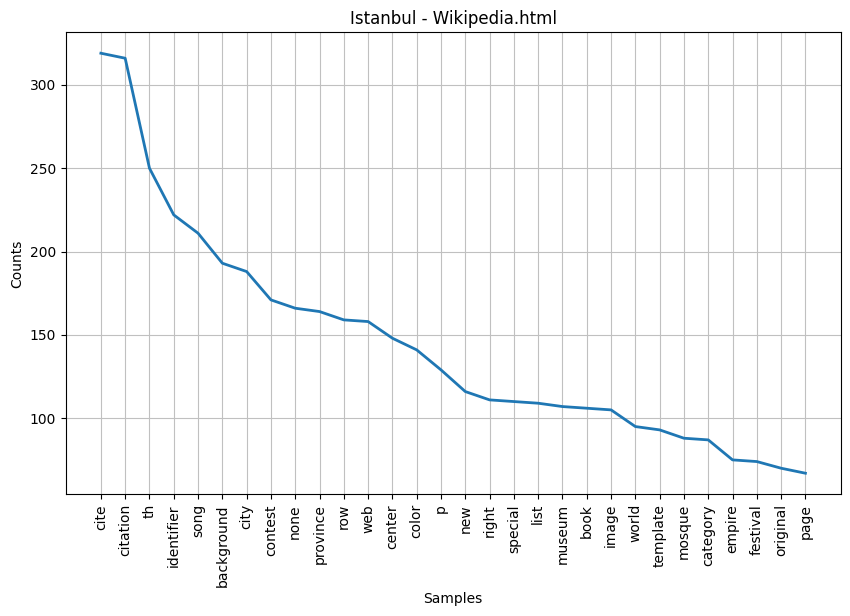

Last 10 minimum elements:
weather : 1
quote : 1
huh : 1
fill : 1
powered : 1
statement : 1
agree : 1
apply : 1
creative : 1
triggered : 1


Top 10 maximum elements:
span : 2034
li : 1950
div : 744
sup : 656
b : 588
reference : 471
link : 463
text : 395
turkey : 376
external : 353
Longest word: transcontinental


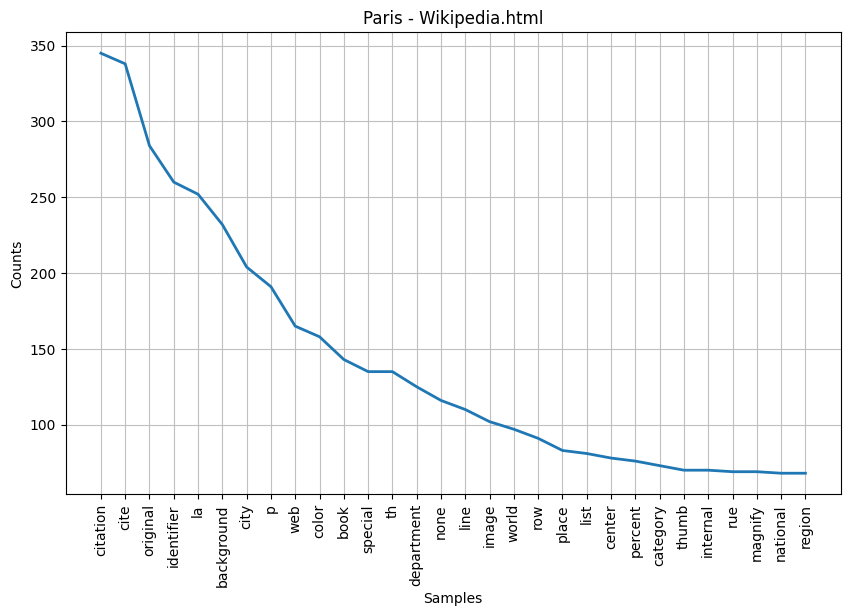

Last 10 minimum elements:
collapsible : 1
powered : 1
statement : 1
mobile : 1
agree : 1
apply : 1
additional : 1
creative : 1
inverted : 1
racecourse : 1


Top 10 maximum elements:
span : 2316
li : 1896
div : 669
text : 663
external : 652
de : 595
sup : 546
b : 480
reference : 422
link : 420
Longest word: constitutionality


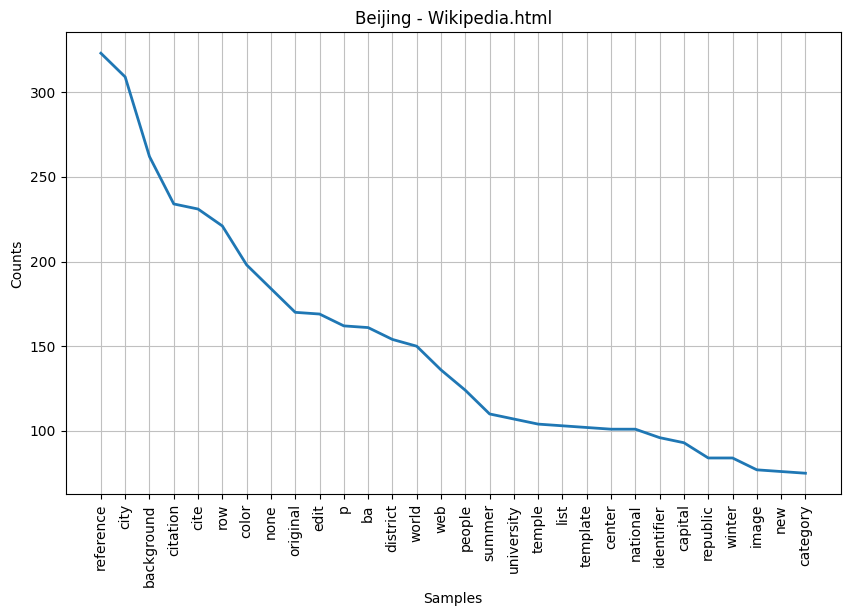

Last 10 minimum elements:
unreferenced : 1
stroke : 1
powered : 1
statement : 1
mobile : 1
agree : 1
apply : 1
rendering : 1
saved : 1
loaded : 1


Top 10 maximum elements:
li : 2789
span : 2390
div : 767
b : 670
text : 539
external : 507
china : 498
sup : 498
th : 363
link : 358
Longest word: entrepreneurship


In [31]:
input_paths=["Test 2/Istanbul - Wikipedia.html","Test 2/Paris - Wikipedia.html","Test 2/Beijing - Wikipedia.html"]
for input_path in input_paths:
    analyze_html_file(input_path)


Testing English HTML FILES

City keyword - According to analyzer, city is a common word for all html files


In [32]:
def test_for_all(input_paths,searched_pattern):
    for input_path in input_paths:
        BruteForce(input_path,searched_pattern)
        HorsPool(input_path,searched_pattern)
        Bayer_Moore(input_path,searched_pattern)
test_for_all(input_paths,"city")

BRUTE FORCE: Test 2/Istanbul - Wikipedia.html
Len: 1059063
Number of comparison: 1090524
Match count: 237
Elapsed time: 0.39394450187683105
----------------

HORSPOOL: Test 2/Istanbul - Wikipedia.html
{'t': 1, 'i': 2, 'c': 3, 'Other letters': 4}
Number of comparison: 293454
Match count: 237
Elapsed time: 0.17253732681274414
----------------

BAYER-MOORE: Test 2/Istanbul - Wikipedia.html
{1: [4, 'y'], 2: [4, 'ty'], 3: [4, 'ity'], 4: [4, 'city']}
{'t': 1, 'i': 2, 'c': 3, 'Other letters': 4}
Number of comparison: 293454
Match count: 237
Elapsed time: 0.2672574520111084
----------------

BRUTE FORCE: Test 2/Paris - Wikipedia.html
Len: 1228627
Number of comparison: 1265574
Match count: 208
Elapsed time: 0.5385825634002686
----------------

HORSPOOL: Test 2/Paris - Wikipedia.html
{'t': 1, 'i': 2, 'c': 3, 'Other letters': 4}
Number of comparison: 338073
Match count: 208
Elapsed time: 0.2014617919921875
----------------

BAYER-MOORE: Test 2/Paris - Wikipedia.html
{1: [4, 'y'], 2: [4, 'ty'], 3:

Turkey keyword - It is just a common word for İstanbul

In [33]:
test_for_all(input_paths,"Turkey")

BRUTE FORCE: Test 2/Istanbul - Wikipedia.html
Len: 1059063
Number of comparison: 1067224
Match count: 740
Elapsed time: 0.41089725494384766
----------------

HORSPOOL: Test 2/Istanbul - Wikipedia.html
{'e': 1, 'k': 2, 'r': 3, 'u': 4, 'T': 5, 'Other letters': 6}
Number of comparison: 199072
Match count: 740
Elapsed time: 0.14161944389343262
----------------

BAYER-MOORE: Test 2/Istanbul - Wikipedia.html
{1: [6, 'y'], 2: [6, 'ey'], 3: [6, 'key'], 4: [6, 'rkey'], 5: [6, 'urkey'], 6: [6, 'Turkey']}
{'e': 1, 'k': 2, 'r': 3, 'u': 4, 'T': 5, 'Other letters': 6}
Number of comparison: 199072
Match count: 740
Elapsed time: 0.19245529174804688
----------------

BRUTE FORCE: Test 2/Paris - Wikipedia.html
Len: 1228627
Number of comparison: 1232405
Match count: 29
Elapsed time: 0.5016269683837891
----------------

HORSPOOL: Test 2/Paris - Wikipedia.html
{'e': 1, 'k': 2, 'r': 3, 'u': 4, 'T': 5, 'Other letters': 6}
Number of comparison: 226096
Match count: 29
Elapsed time: 0.16655635833740234
--------

Longest word search:

In [34]:
#constitutionality-Paris
#entrepreneurship-Beijing
#transcontinental-Turkey
test_for_all(["Test 2\Beijing - Wikipedia.html"],"entreprenurship")
test_for_all(["Test 2\Istanbul - Wikipedia.html"],"transcontinental")
test_for_all(["Test 2\Paris - Wikipedia.html"],"constitutionality")

BRUTE FORCE: Test 2\Beijing - Wikipedia.html
Len: 1237867
Number of comparison: 1319650
Match count: 0
Elapsed time: 0.5156424045562744
----------------

HORSPOOL: Test 2\Beijing - Wikipedia.html
{'i': 1, 'h': 2, 's': 3, 'r': 4, 'u': 5, 'n': 6, 'e': 7, 'p': 9, 't': 12, 'Other letters': 15}
Number of comparison: 108423
Match count: 0
Elapsed time: 0.06380152702331543
----------------

BAYER-MOORE: Test 2\Beijing - Wikipedia.html
{1: [9, 'p'], 2: [15, 'ip'], 3: [15, 'hip'], 4: [15, 'ship'], 5: [15, 'rship'], 6: [15, 'urship'], 7: [15, 'nurship'], 8: [15, 'enurship'], 9: [15, 'renurship'], 10: [15, 'prenurship'], 11: [15, 'eprenurship'], 12: [15, 'reprenurship'], 13: [15, 'treprenurship'], 14: [15, 'ntreprenurship'], 15: [15, 'entreprenurship']}
{'i': 1, 'h': 2, 's': 3, 'r': 4, 'u': 5, 'n': 6, 'e': 7, 'p': 9, 't': 12, 'Other letters': 15}
Number of comparison: 108101
Match count: 0
Elapsed time: 0.10372400283813477
----------------

BRUTE FORCE: Test 2\Istanbul - Wikipedia.html
Len: 10590

Letter Search - a

In [35]:
test_for_all(input_paths,"a")

BRUTE FORCE: Test 2/Istanbul - Wikipedia.html
Len: 1059063
Number of comparison: 1059063
Match count: 62501
Elapsed time: 0.45478224754333496
----------------

HORSPOOL: Test 2/Istanbul - Wikipedia.html
{'Other letters': 1}
Number of comparison: 1059063
Match count: 62501
Elapsed time: 0.6043825149536133
----------------

BAYER-MOORE: Test 2/Istanbul - Wikipedia.html
{1: [0, 'a']}
{'Other letters': 1}
Number of comparison: 1059063
Match count: 62501
Elapsed time: 0.7888901233673096
----------------

BRUTE FORCE: Test 2/Paris - Wikipedia.html
Len: 1228627
Number of comparison: 1228627
Match count: 71774
Elapsed time: 0.49068713188171387
----------------

HORSPOOL: Test 2/Paris - Wikipedia.html
{'Other letters': 1}
Number of comparison: 1228627
Match count: 71774
Elapsed time: 0.6821498870849609
----------------

BAYER-MOORE: Test 2/Paris - Wikipedia.html
{1: [0, 'a']}
{'Other letters': 1}
Number of comparison: 1228627
Match count: 71774
Elapsed time: 0.9594244956970215
----------------
